### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-29,438210,4512703,637539,579308,258165,132760,129093,178457,125895,92146,84000,124811,106482,4848,198115
2021-08-30,438560,4521635,638711,579574,258491,132808,129146,179233,126054,92208,84146,124883,107151,4848,198263
2021-08-31,439020,4530720,640108,580413,259326,132859,129221,180009,126202,92229,84340,124945,107794,4848,198263
2021-09-01,439529,4543168,642081,581150,260503,133066,129290,180781,126310,92262,84472,125016,108393,4848,198295
2021-09-02,439895,4541414,643669,581914,261496,133244,129352,181560,115108,92307,84640,125097,108988,4848,198364


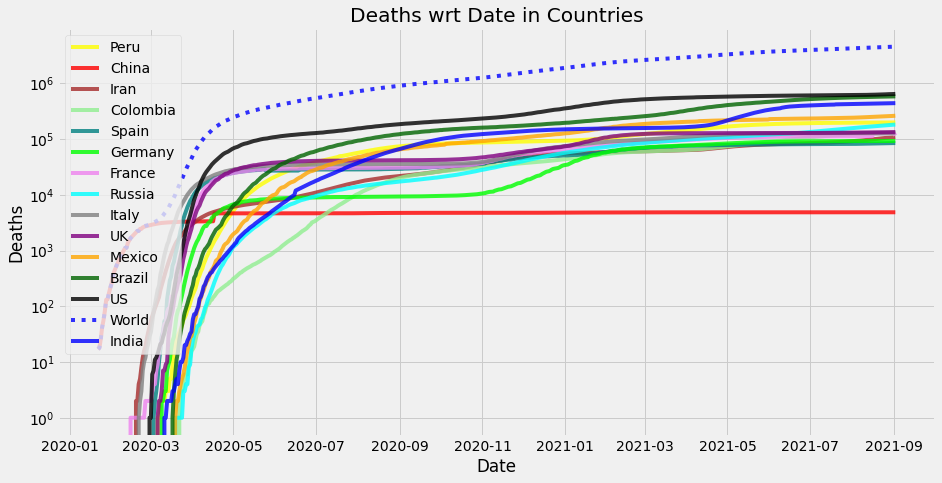

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-29,42909,442725,38475,13210,6837,32992,5954,18798,13630,6627,0,1954,31516,30,0
2021-08-30,30941,685955,258537,10466,5564,26285,4253,17858,7688,6823,15489,2006,33780,40,2306
2021-08-31,41965,588450,140705,24589,11146,32167,5492,17374,24,18646,7767,1822,31319,21,0
2021-09-01,47092,722949,198025,27345,17337,35577,6496,17955,33129,14158,6818,1996,33170,29,415
2021-09-02,45352,631605,153143,26280,18138,37982,6754,18591,14154,13950,9561,1949,30279,28,2112


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-29,38913,625344,126265,29486,16113,31916,6052,20379,20143,6185,11699,4944,33926,50,1144
2021-08-30,38382,629385,135083,28218,15410,31540,5932,20211,19312,6228,11951,4748,33916,50,1222
2021-08-31,38621,626656,135458,27976,15125,31582,5903,20022,18026,7056,11672,4553,33743,48,1140
2021-09-01,39185,633075,139629,27934,15273,31848,5942,19884,19033,7529,11349,4383,33705,46,1092
2021-09-02,39596,632977,140530,27824,15464,32257,5996,19797,18708,7957,11229,4220,33477,45,1160


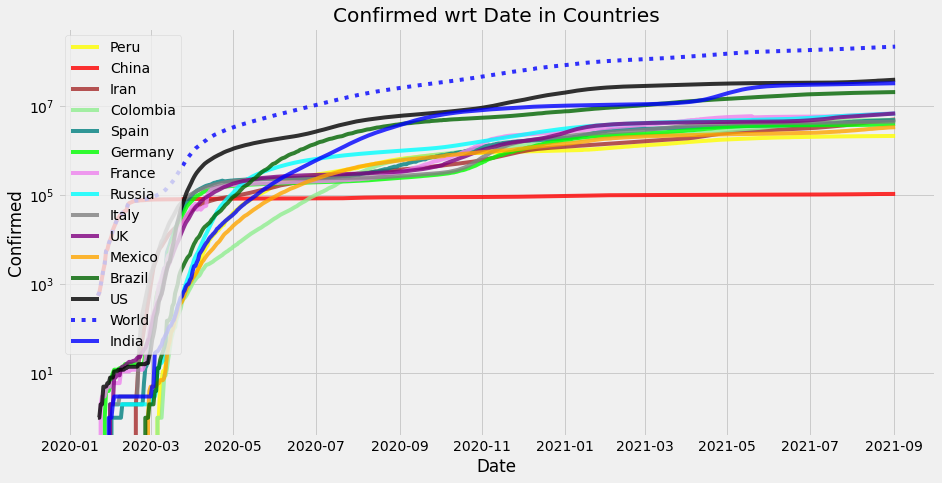

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-29,380,6721,285,298,259,61,37,778,53,10,0,68,581,0,0
2021-08-30,350,8932,1172,266,326,48,53,776,159,62,146,72,669,0,148
2021-08-31,460,9085,1397,839,835,51,75,776,148,21,194,62,643,0,0
2021-09-01,509,12448,1973,737,1177,207,69,772,108,33,132,71,599,0,32
2021-09-02,366,-1754,1588,764,993,178,62,779,-11202,45,168,81,595,0,69


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-29,476.96,9912.16,1067.11,715.41,657.56,104.37,43.62,777.16,390.58,17.31,90.46,105.30,598.03,-0.0,45.10
2021-08-30,461.09,9789.64,1080.22,659.23,616.12,97.33,44.79,777.01,361.63,22.89,97.40,101.14,606.90,-0.0,57.97
2021-08-31,460.95,9701.56,1119.82,681.70,643.48,91.54,48.57,776.89,334.93,22.66,109.47,96.25,611.41,-0.0,50.72
2021-09-01,466.96,10044.87,1226.47,688.61,710.17,105.97,51.12,776.27,306.56,23.95,112.29,93.09,609.86,-0.0,48.38
2021-09-02,454.34,8570.01,1271.66,698.04,745.52,114.97,52.48,776.62,-1132.01,26.58,119.25,91.58,608.00,-0.0,50.96


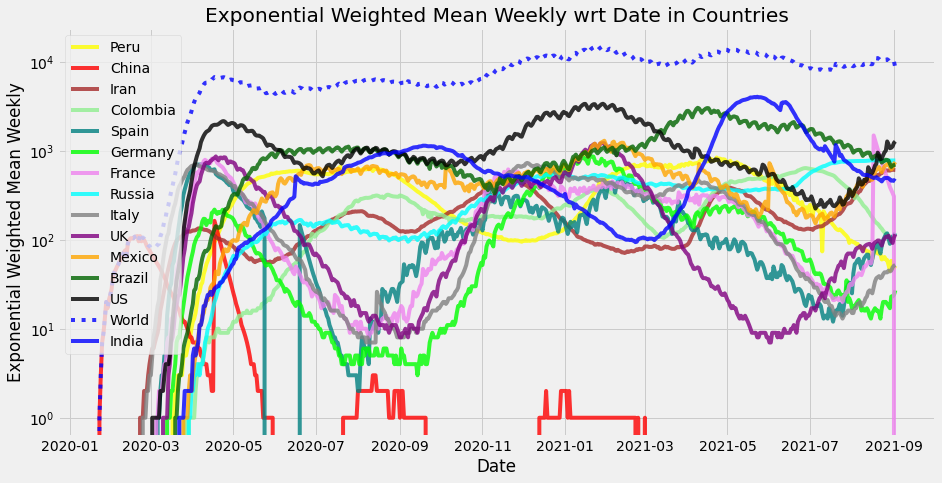

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

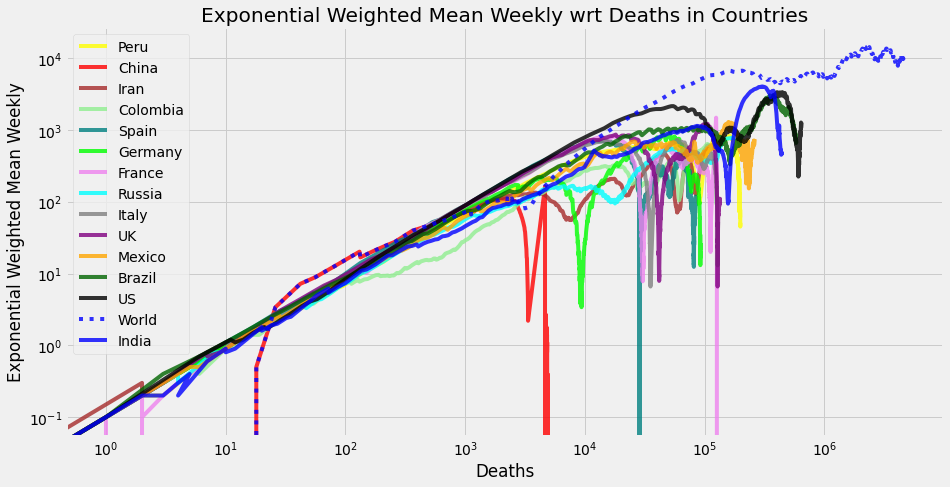

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

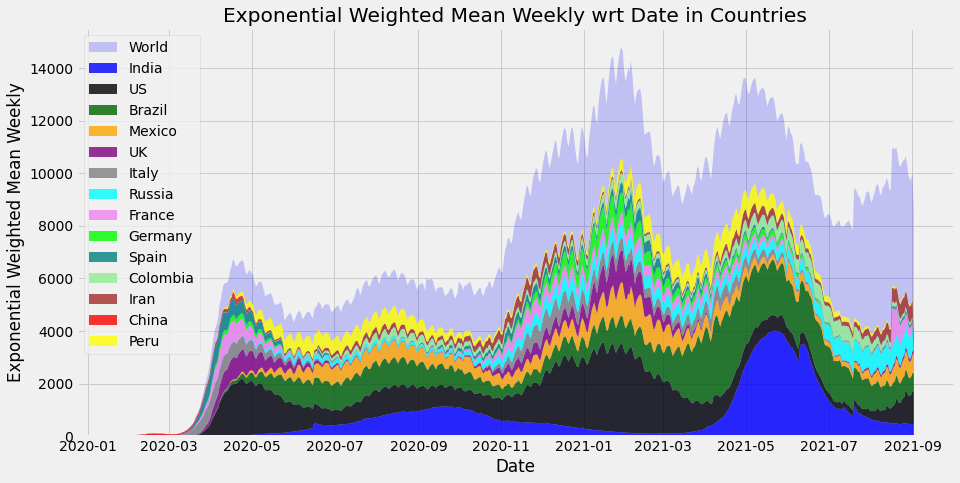

In [20]:
stackplotter(AVG, name)

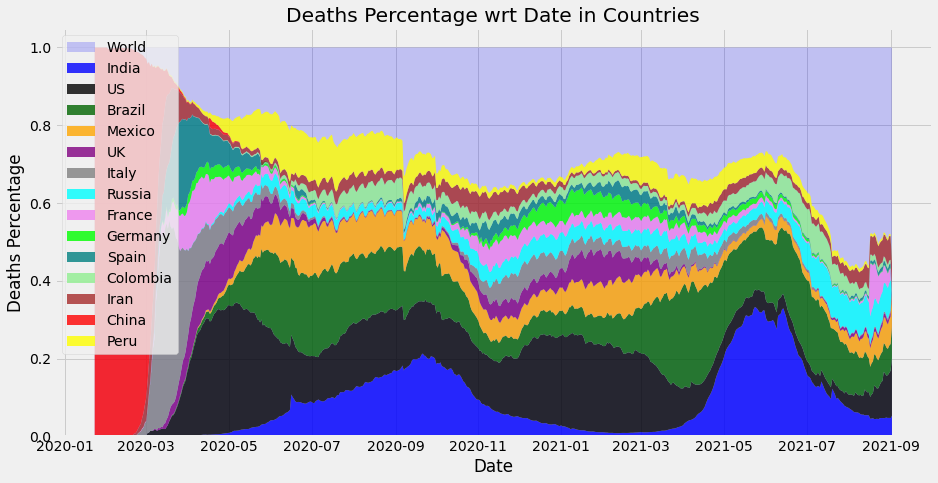

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

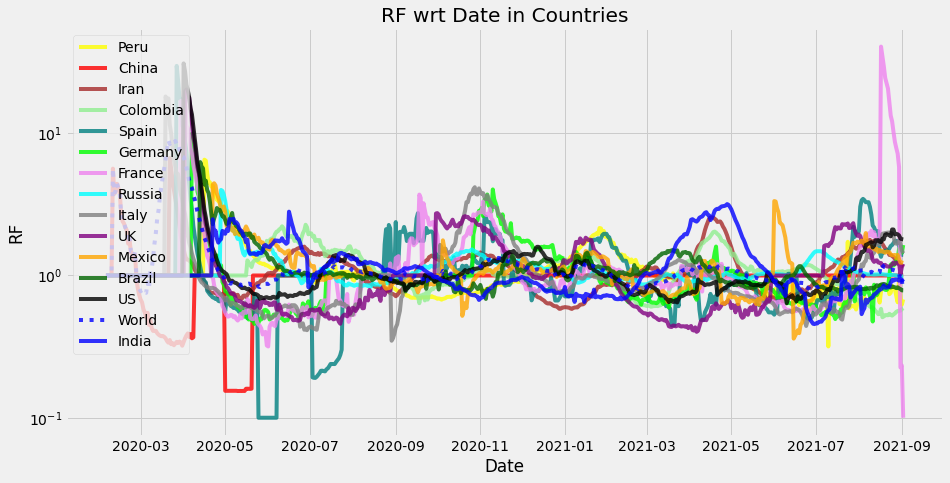

In [23]:
plotter(Reproductivity, 'RF')

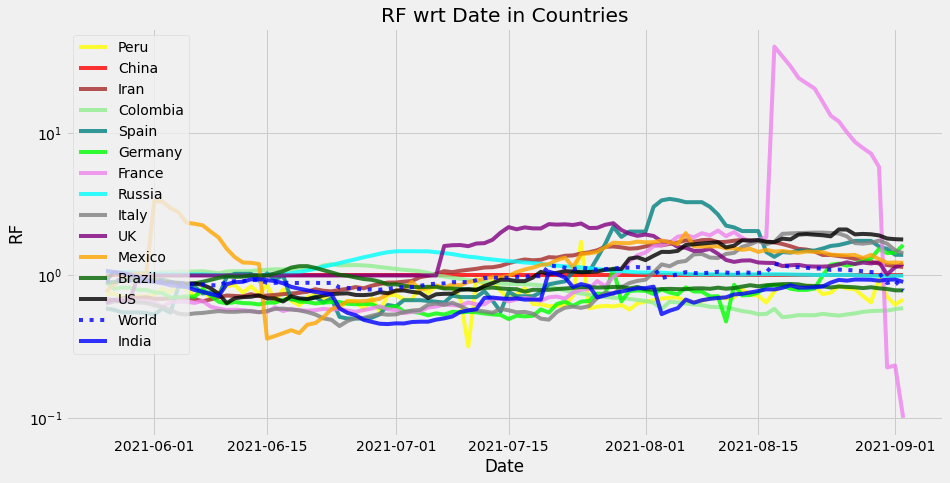

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

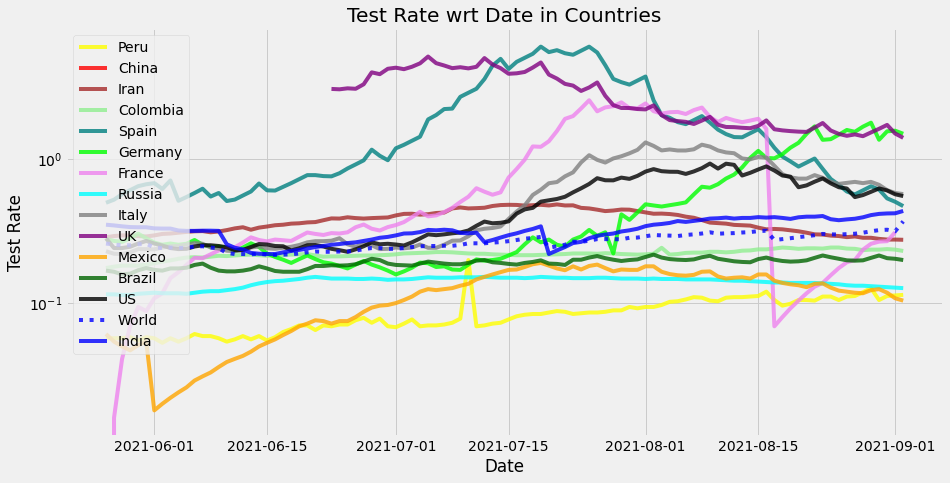

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

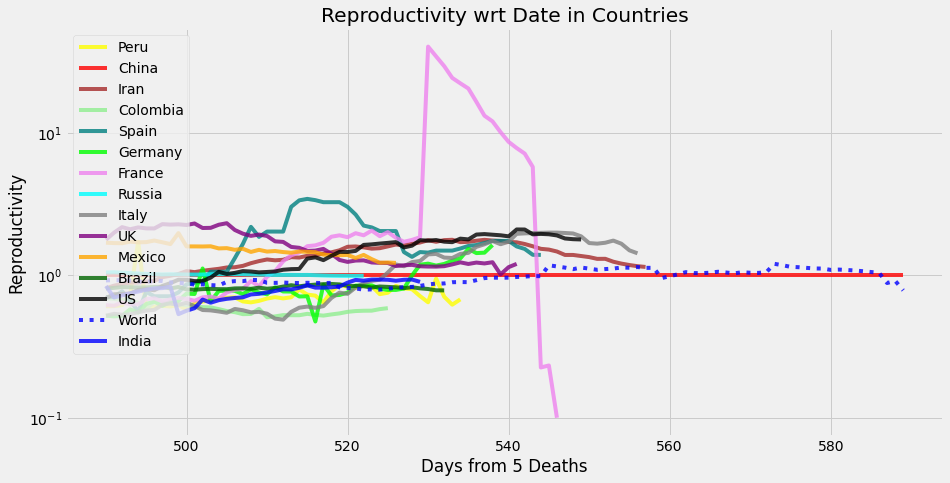

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

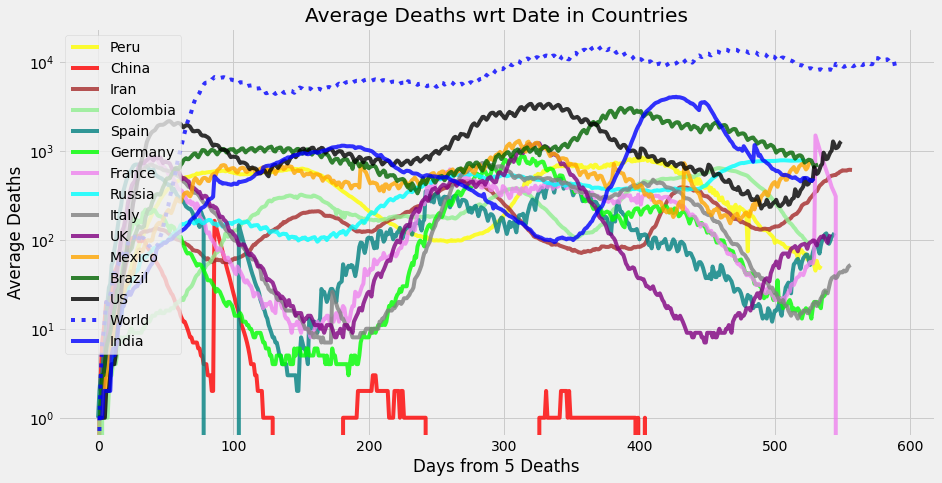

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

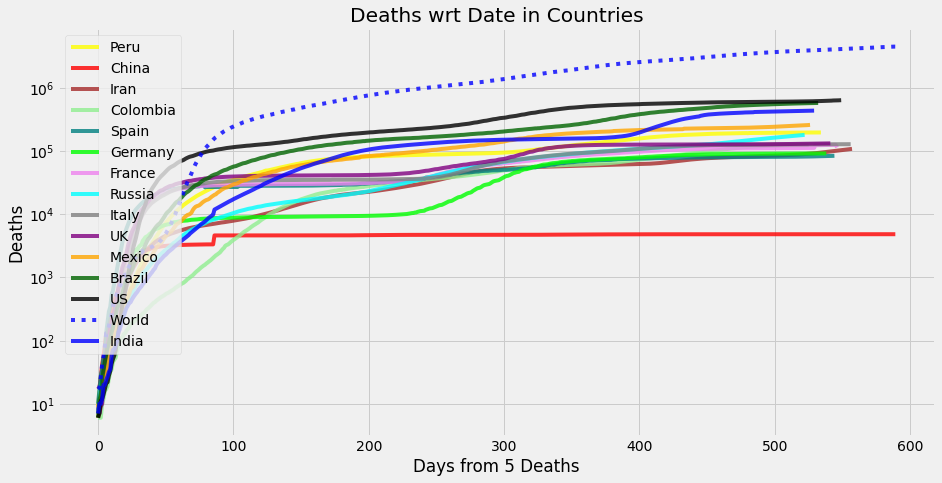

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4541414,-1754,7930.29,8570.01,0.7861,219062869,0.369,632977,908.28
US,643669,1588,1443.57,1271.66,1.7916,39549299,0.553,140530,128.73
Brazil,581914,764,621.29,698.04,0.7858,20830495,0.199,27824,116.38
India,439895,366,433.43,454.34,0.9020,32903289,0.436,39596,87.98
Mexico,261496,993,744.14,745.52,1.2261,3387885,0.104,15464,52.30
Peru,198364,69,42.86,50.96,0.6793,2152118,0.114,1160,39.67
Russia,181560,779,776.14,776.62,0.9965,6857243,0.127,19797,36.31
Indonesia,133676,0,499.14,747.73,0.5306,4100138,0.119,17856,26.74
UK,133244,178,111.29,114.97,1.2070,6894915,1.403,32257,26.65


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4541414,-1754,7930.29,8570.01,0.7861,219062869,0.369,632977,908.28
US,643669,1588,1443.57,1271.66,1.7916,39549299,0.553,140530,128.73
Russia,181560,779,776.14,776.62,0.9965,6857243,0.127,19797,36.31
Mexico,261496,993,744.14,745.52,1.2261,3387885,0.104,15464,52.30
Brazil,581914,764,621.29,698.04,0.7858,20830495,0.199,27824,116.38
Iran,108988,595,610.29,608.00,1.1484,5055512,0.275,33477,21.80
Indonesia,133676,0,499.14,747.73,0.5306,4100138,0.119,17856,26.74
India,439895,366,433.43,454.34,0.9020,32903289,0.436,39596,87.98
Vietnam,12138,270,353.00,350.88,1.1338,486727,0.154,10776,2.43


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4541414


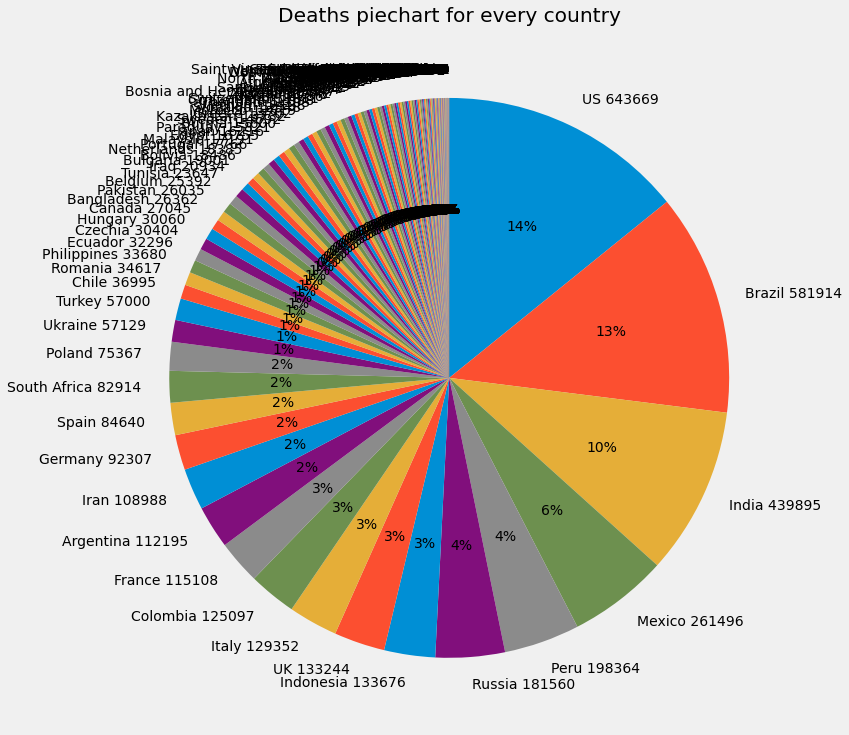

In [35]:
piechart('Deaths')

World total:  7930


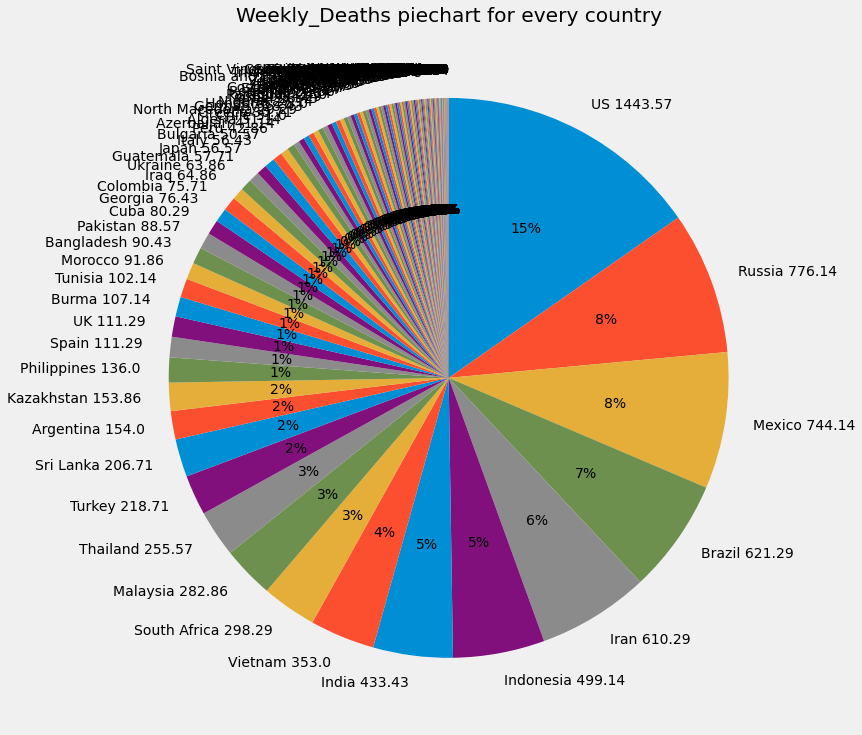

In [36]:
piechart('Weekly_Deaths')

World total:  -1754


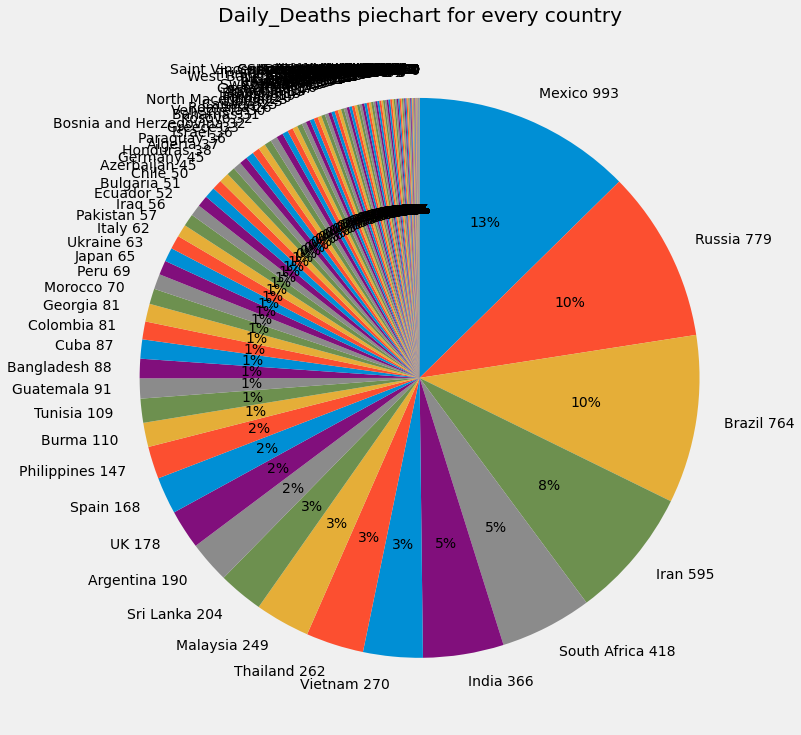

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-09-03


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

908282800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master d69597f] `date` update
 1 file changed, 2131 insertions(+), 2124 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (68%)


To https://github.com/Arrowheadahp/COVID-19.git
   241a0fc..d69597f  master -> master
